# 练习

下面使用 Matplotlib 库来绘制一个股票 K 线图。

In [32]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

%matplotlib inline

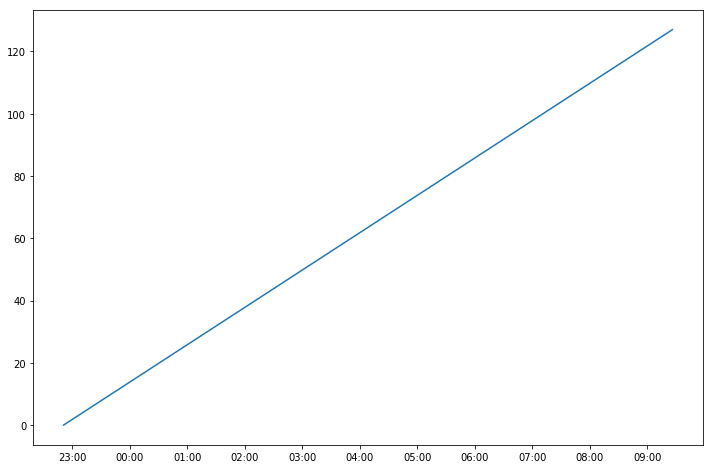

In [12]:
now =  datetime.datetime.now()
ndatas = 128

d = datetime.timedelta(minutes=5)
times = [now + d * j for j in range(ndatas)]
plt.figure(figsize=(12,8))
ax = plt.gca() # get the current axes
ax.plot(times, range(ndatas))

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the the auto-formatter
bdf = xax.get_minor_formatter(mdates.M) # the the auto-formatter

adf.scaled[1./24] = '%H:%M'  # set the < 1d scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1d < 1m scale to Y-m-d
adf.scaled[30.] = '%Y-%m' # set the > 1m < 1Y scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1y scale to Y

plt.draw()

In [10]:
adf.scaled?

In [13]:
bdf.scaled?

Object `bdf.scaled` not found.


In [15]:
xax.get_minor_formatter?

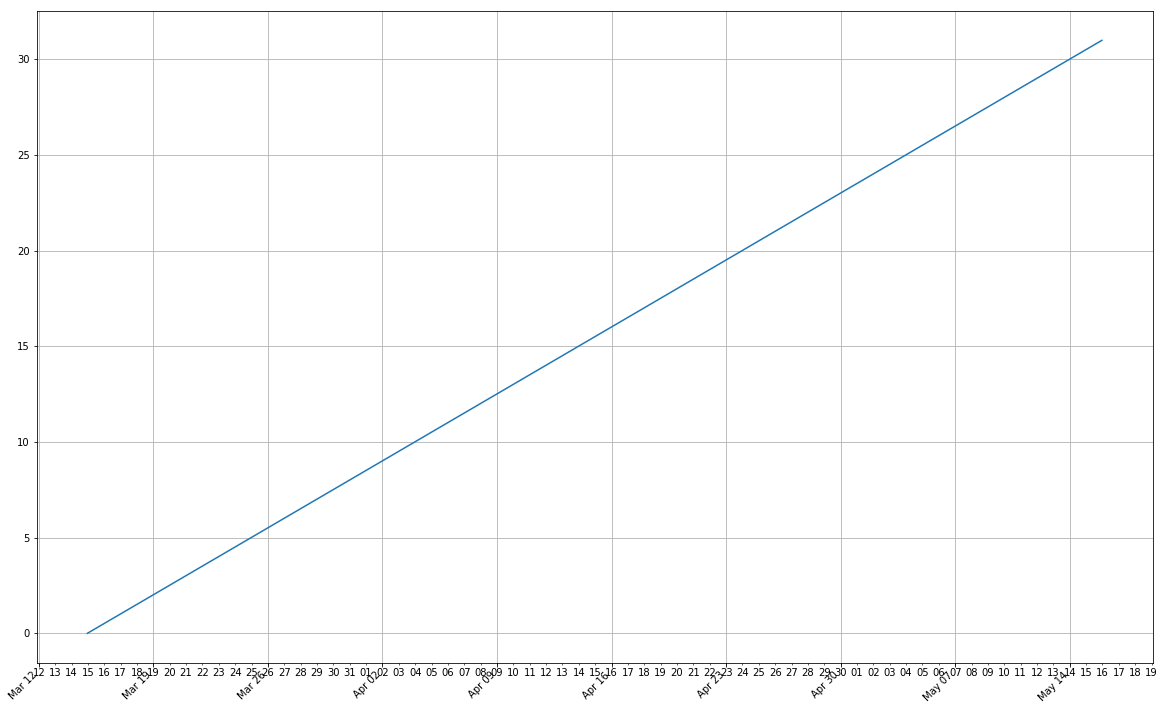

In [25]:
now =  datetime.datetime.now()
ndatas = 32

d = datetime.timedelta(days=2)
times = [now + d * j for j in range(ndatas)]

mondays = mdates.WeekdayLocator(mdates.MONDAY)   # major ticks on the mondays
alldays = mdates.DayLocator()                           # minor ticks on the days
weekFormatter = mdates.DateFormatter('%b %d')           # e.g., Jan 12
dayFormatter = mdates.DateFormatter('%d')               # e.g., 12

plt.figure(figsize=(20,12))
ax = plt.gca() # get the current axes
ax.plot(times, range(ndatas))
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.xaxis.set_minor_formatter(dayFormatter)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid()
plt.show() 

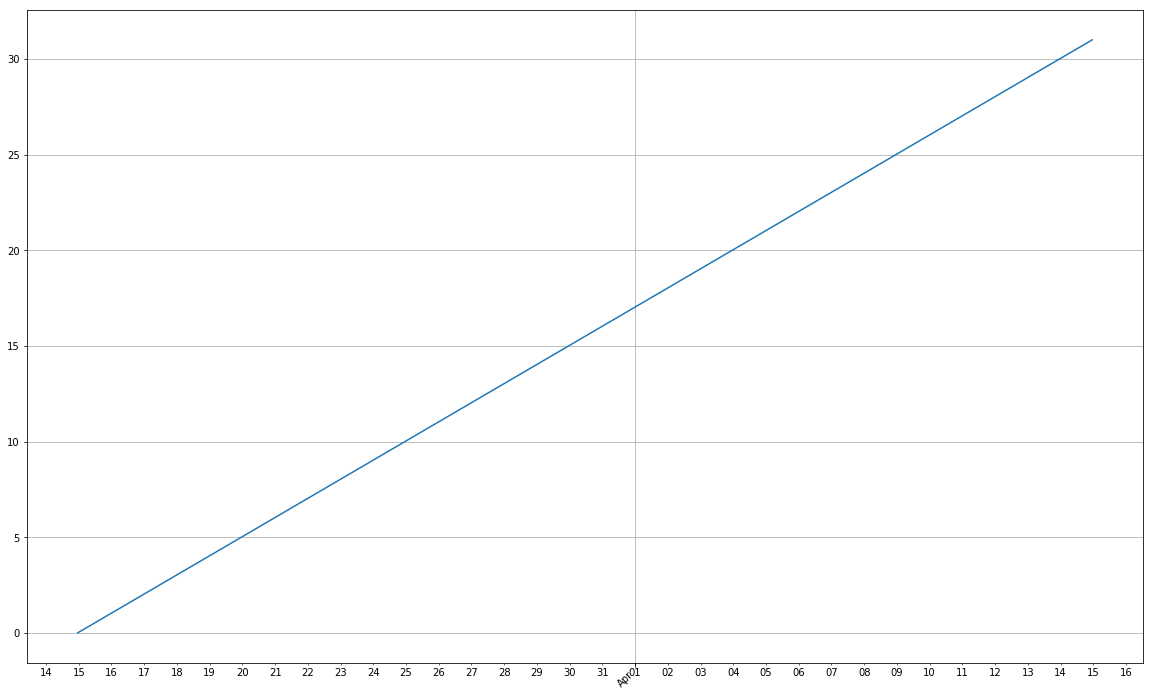

In [29]:
now =  datetime.datetime.now()
ndatas = 32

d = datetime.timedelta(days=1)
times = [now + d * j for j in range(ndatas)]

mondays = mdates.MonthLocator(interval=1)                # major ticks on the mondays
alldays = mdates.DayLocator()                            # minor ticks on the days
weekFormatter = mdates.DateFormatter('%b')               # e.g., Jan 12
dayFormatter = mdates.DateFormatter('%d')                # e.g., 12

plt.figure(figsize=(20,12))
ax = plt.gca() # get the current axes
ax.plot(times, range(ndatas))
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.xaxis.set_minor_formatter(dayFormatter)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid()
plt.show() 

In [ ]:
def setAxisScaleX(self, x_axis_bins):
        """The setAxisScaleX() method sets the bins for the X axis. Presently,
        we assume a date-based axis."""
        if self.verboseLogging:
            self.logger.threaddebug(u"Constructing the bins for the X axis.")

        if x_axis_bins == 'quarter-hourly':
            plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=4))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 96)))
        if x_axis_bins == 'half-hourly':
            plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=4))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 48)))
        elif x_axis_bins == 'hourly':
            plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=4))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 24)))
        elif x_axis_bins == 'hourly_4':
            plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=4))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 8)))
        elif x_axis_bins == 'hourly_8':
            plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=4))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 4)))
        elif x_axis_bins == 'hourly_12':
            plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=4))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 2)))
        elif x_axis_bins == 'daily':
            plt.gca().xaxis.set_major_locator(mdate.DayLocator(interval=1))
            plt.gca().xaxis.set_minor_locator(mdate.HourLocator(byhour=range(0, 24, 6)))
        elif x_axis_bins == 'weekly':
            plt.gca().xaxis.set_major_locator(mdate.DayLocator(interval=7))
            plt.gca().xaxis.set_minor_locator(mdate.DayLocator(interval=1))
        elif x_axis_bins == 'monthly':
            plt.gca().xaxis.set_major_locator(mdate.MonthLocator(interval=1))
            plt.gca().xaxis.set_minor_locator(mdate.DayLocator(interval=1))
        elif x_axis_bins == 'yearly':
            plt.gca().xaxis.set_major_locator(mdate.YearLocator())
            plt.gca().xaxis.set_minor_locator(mdate.MonthLocator(interval=12)) 

In [ ]:
def _make_chart(df, chartfn, **kwargs):
    fig = plt.figure()
    ax1 = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4)
    ax1.grid(True)
    plt.ylabel('Price')
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    chartfn(df, ax1)
    if 'lines' in kwargs:
        _plot_lines(kwargs['lines'])
    if 'band' in kwargs:
        _plot_band(kwargs['band'])
    if 'events' in kwargs:
        _plot_events(kwargs['events'])

    ax2 = plt.subplot2grid((6, 4), (5, 0), sharex=ax1, rowspan=1, colspan=4)
    volume = df['volume']
    pos = df['open'] - df['close'] <= 0  # mask
    neg = df['open'] - df['close'] > 0
    ax2.bar(volume[pos].index, volume[pos], color='red', width=0.4, align='center', alpha=0.5)
    ax2.bar(volume[neg].index, volume[neg], color='green', width=0.4, align='center', alpha=0.5)
    # ax2.bar(df.index, df.loc[:, 'volume'],align='center')
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(12))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    if len(df.index) <= 500:
        ax2.xaxis.set_minor_locator(mdates.DayLocator())
    ax2.yaxis.set_ticklabels([])
    ax2.grid(True)
    plt.ylabel('Volume')
    plt.xlabel('DateTime')
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    ax3 = plt.subplot2grid((6, 4), (0, 0), sharex=ax1, rowspan=1, colspan=4)
    if 'tracks' in kwargs:
        _plot_tracks(kwargs['tracks'])
    ax3.yaxis.set_ticklabels([])
    # ax3.yaxis.tick_right()
    ax3.grid(True)
    ax3.xaxis.set_visible(False)
    ax3.set_ylabel('Observe')
    plt.subplots_adjust(left=.09, bottom=.18, right=.94, top=0.94, wspace=.20, hspace=0)
    if 'title' in kwargs:
        plt.suptitle(kwargs['title'])
    if 'fname' in kwargs:
        plt.savefig(kwargs['fname'], bbox_inches='tight')
    plt.show()
    # plt.close() 

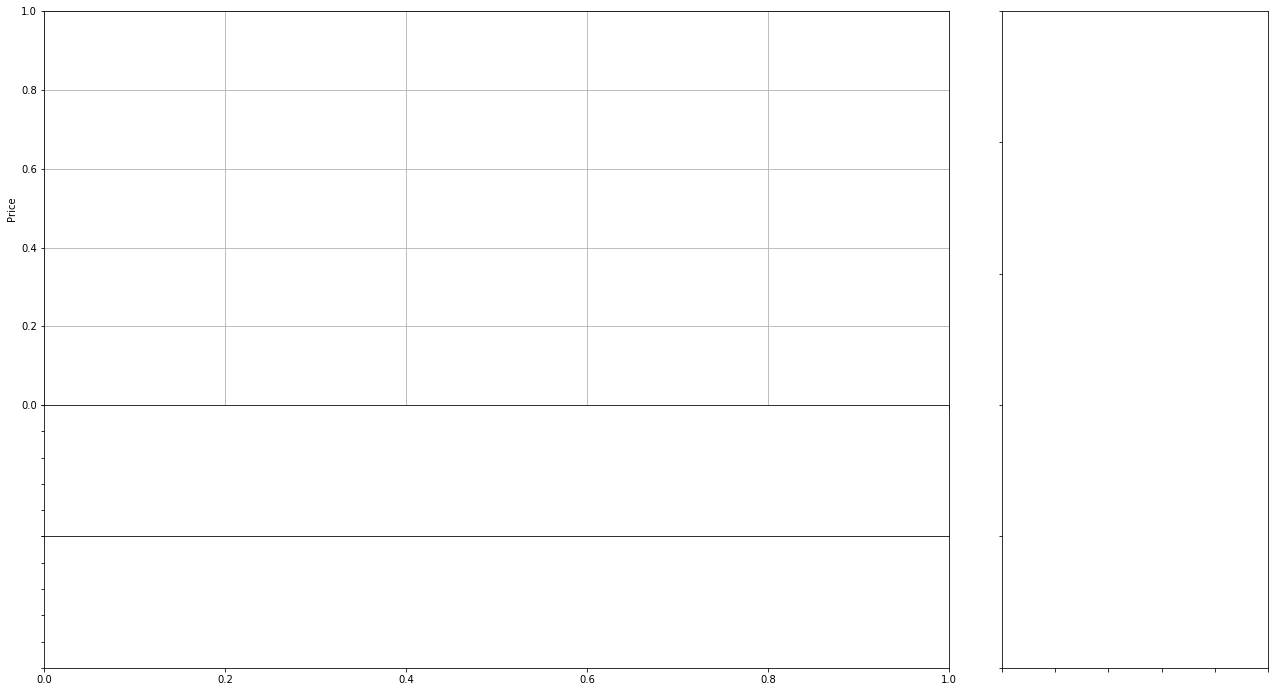

In [60]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.subplot2grid((20, 12), (0, 0), rowspan=12, colspan=9)
ax1.grid(True)
plt.ylabel('Price')
plt.setp(plt.gca().get_xticklabels(), visible=False)

ax2 = plt.subplot2grid((20, 12), (12, 0), sharex=ax1, rowspan=4, colspan=9)
#plt.ylabel('Price2')
ax2.grid(False)
ax2.yaxis.set_ticklabels([])
ax2.xaxis.set_visible(False)
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax3 = plt.subplot2grid((20, 12), (16, 0), sharex=ax2, rowspan=4, colspan=9)
#plt.ylabel('Price3')
ax3.grid(False)
#ax3.xaxis.set_visible(False)
ax3.yaxis.set_ticklabels([])
#ax3.yaxis.tick_right()
ax4 = plt.subplot2grid((20, 12), (0, 9), rowspan=20, colspan=3)
ax4.yaxis.set_ticklabels([])
ax4.xaxis.set_ticklabels([])

plt.subplots_adjust(left=.09, bottom=.18, right=.94, top=0.94, wspace=1., hspace=0)
plt.show()
# plt.close() 

In [61]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [62]:

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/opt/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/goog.npz'

In [63]:
cbook.get_sample_data?

In [69]:
!ls /opt/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/images

back.gif	    hand_large.gif	  move.png
back_large.gif	    hand.pdf		  move.svg
back_large.png	    hand.png		  qt4_editor_options_large.png
back.pdf	    hand.svg		  qt4_editor_options.pdf
back.png	    home.gif		  qt4_editor_options.png
back.svg	    home_large.gif	  qt4_editor_options.svg
filesave.gif	    home_large.png	  subplots.gif
filesave_large.gif  home.pdf		  subplots_large.gif
filesave_large.png  home.png		  subplots_large.png
filesave.pdf	    home.svg		  subplots.pdf
filesave.png	    matplotlib_large.png  subplots.png
filesave.svg	    matplotlib.pdf	  subplots.svg
forward.gif	    matplotlib.png	  zoom_to_rect.gif
forward_large.gif   matplotlib.ppm	  zoom_to_rect_large.gif
forward_large.png   matplotlib.svg	  zoom_to_rect_large.png
forward.pdf	    move.gif		  zoom_to_rect.pdf
forward.png	    move_large.gif	  zoom_to_rect.png
forward.svg	    move_large.png	  zoom_to_rect.svg
hand.gif	    move.pdf


In [ ]:
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.dates import bytespdate2num, num2date
from matplotlib.ticker import Formatter


datafile = cbook.get_sample_data('msft.csv', asfileobj=False)
print('loading %s' % datafile)
msft_data = np.genfromtxt(datafile, delimiter=',', names=True,
                          converters={0: bytespdate2num('%d-%b-%y')})[-40:]


class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return num2date(self.dates[ind]).strftime(self.fmt)

formatter = MyFormatter(msft_data['Date'])

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(np.arange(len(msft_data)), msft_data['Close'], 'o-')
fig.autofmt_xdate()
plt.show()

In [ ]:
ax4.text(5, 5, '002677-浙江美大', ha='center', fontsize=5)